Day12: When should I use a "groupby" in pandas?

The pandas "groupby" method allows you to split a DataFrame into groups, apply a function to each group independently, and then combine the results back together. This is called the "split-apply-combine" pattern, and is a powerful tool for analyzing data across different categories. 


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
drinks = pd.read_csv("https://bit.ly/drinksbycountry")

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


Now, if you want to calculate what will be the average beer serving across the country. 


In [5]:
drinks.beer_servings.mean()

106.16062176165804

If you want to get the beer serving by continents. In these case groupby can be useful.

In [7]:
drinks.groupby("continent").beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [9]:
drinks[drinks.continent == "Asia"].beer_servings.mean() # This will give us the data for countries in africa.

61.471698113207545

When should you use groupby in general, - when you want to analysis some pandas series by some category. In the above case the category is continent. 
'For each continent what is the mean beer servings' ?

In [16]:
drinks.groupby("continent").beer_servings.agg(['count', 'min', 'max', 'mean', 'std'])

,count,min,max,mean,std
continent,,,,,
Africa,53,0,376,61.471698,80.557816
Asia,44,0,247,37.045455,49.469725
Europe,45,0,361,193.777778,99.631569
North America,23,1,285,145.434783,79.621163
Oceania,16,0,306,89.687500,96.641412
South America,12,93,333,175.083333,65.242845


Using count on the groupby we can get the number of countries in each continent.

In [18]:
drinks.groupby("continent").mean(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In order to visualize the data using matplotlib

In [36]:
%matplotlib inline
# %matplotlib notebook

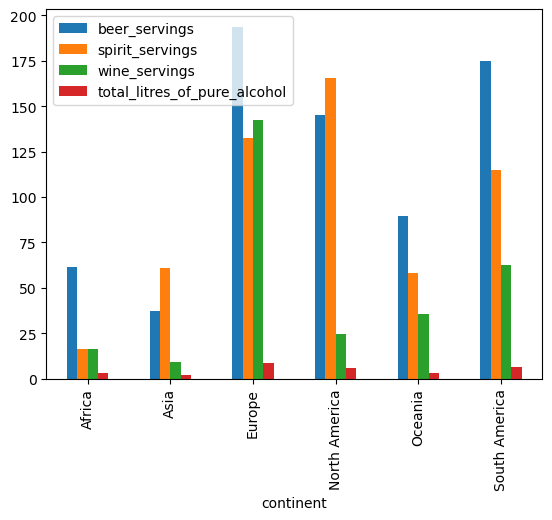

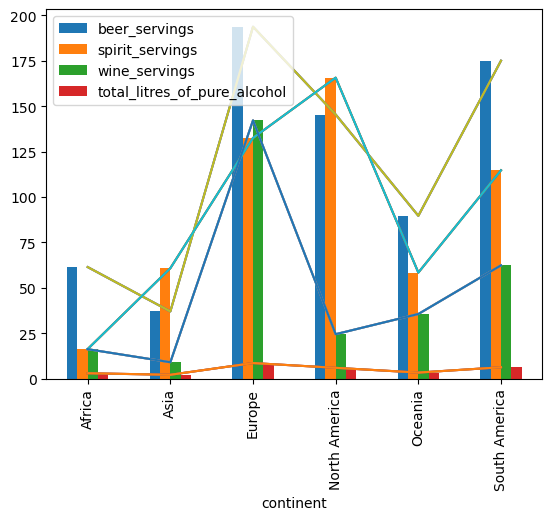

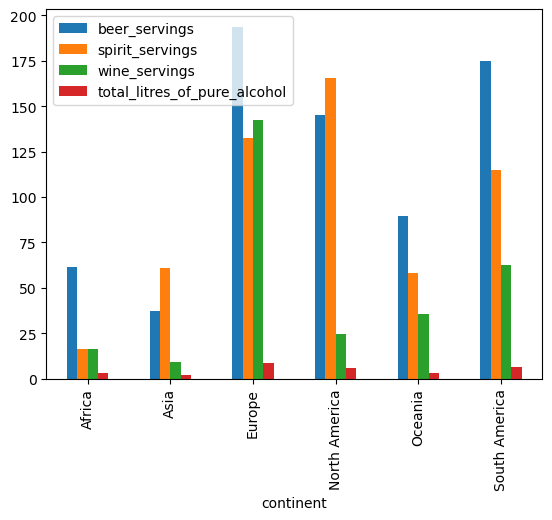

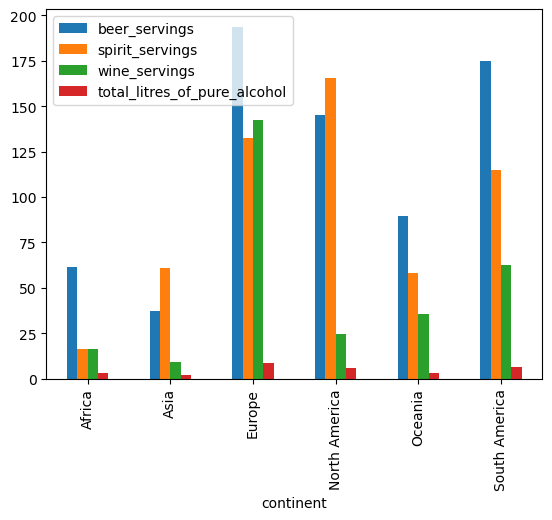

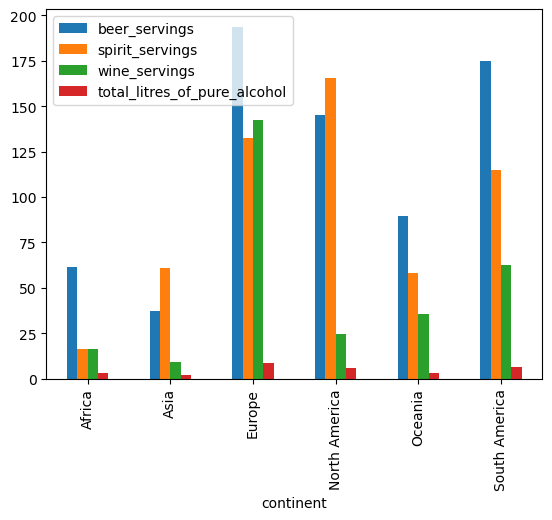

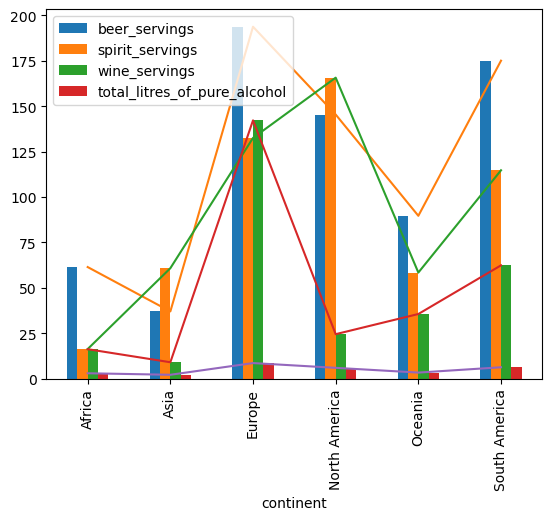

In [39]:
dr = drinks.groupby("continent").mean(numeric_only=True)
plt.plot(dr)
plt.show()